In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'


Mounted at /content/drive


In [3]:
# Load VGG16 model for feature extraction
model = DenseNet121(weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 1s 0us/step


In [4]:
# Function to extract features from an image
def extract_features_Densenet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [5]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Densenet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 157ms/step


In [6]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Densenet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 157ms/step


In [7]:

import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()

Training Bernoulli Naive Bayes for DenseNet...
Performance metrics for Bernoulli Naive Bayes with DenseNet:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        60
           1       0.53      0.72      0.61        60
           2       0.44      0.37      0.40        60
           3       0.69      0.95      0.80        60
           4       0.93      0.62      0.74        60

    accuracy                           0.65       300
   macro avg       0.67      0.65      0.65       300
weighted avg       0.67      0.65      0.65       300

Accuracy: 0.65
Sensitivity: 0.65
Precision: 0.6730439762269691
F1 Score: 0.6452754316471699
Specificity: 0.65
Recall: 0.65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


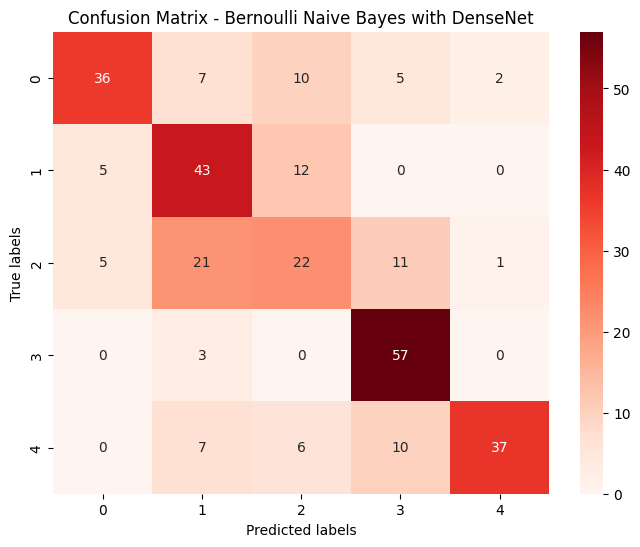

Training Multinomial Naive Bayes for DenseNet...
Performance metrics for Multinomial Naive Bayes with DenseNet:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.57      0.65        60
           1       0.51      0.72      0.60        60
           2       0.42      0.35      0.38        60
           3       0.62      0.93      0.75        60
           4       0.94      0.50      0.65        60

    accuracy                           0.61       300
   macro avg       0.65      0.61      0.61       300
weighted avg       0.65      0.61      0.61       300

Accuracy: 0.6133333333333333
Sensitivity: 0.6133333333333333
Precision: 0.6528708513708514
F1 Score: 0.6063454275193406
Specificity: 0.6133333333333333
Recall: 0.6133333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


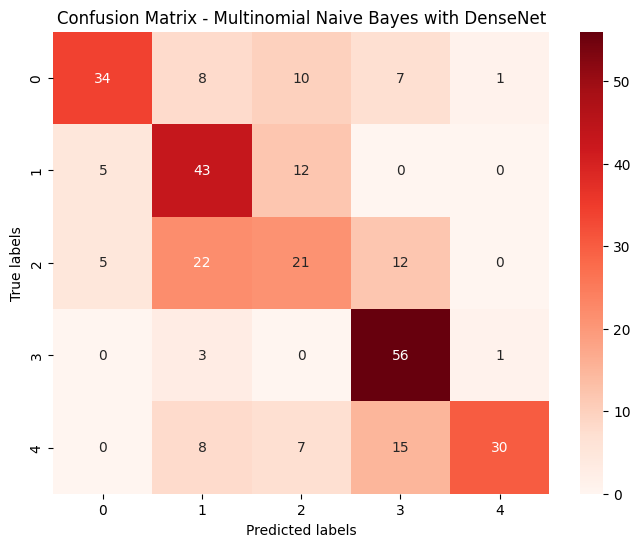

Training Complement Naive Bayes for DenseNet...
Performance metrics for Complement Naive Bayes with DenseNet:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.45      0.61        60
           1       0.51      0.73      0.60        60
           2       0.41      0.32      0.36        60
           3       0.55      0.93      0.70        60
           4       0.89      0.55      0.68        60

    accuracy                           0.60       300
   macro avg       0.66      0.60      0.59       300
weighted avg       0.66      0.60      0.59       300

Accuracy: 0.5966666666666667
Sensitivity: 0.5966666666666667
Precision: 0.6592344849785438
F1 Score: 0.5879872279801642
Specificity: 0.5966666666666667
Recall: 0.5966666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


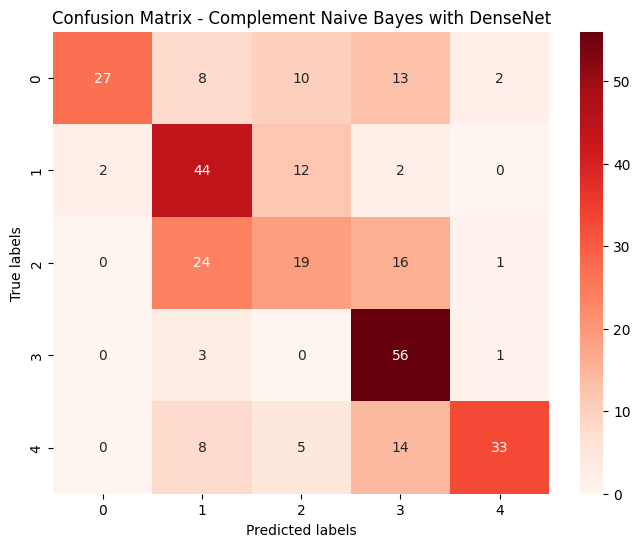

Training Gaussian Naive Bayes for DenseNet...
Performance metrics for Gaussian Naive Bayes with DenseNet:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0
Specificity: 1.0
Recall: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


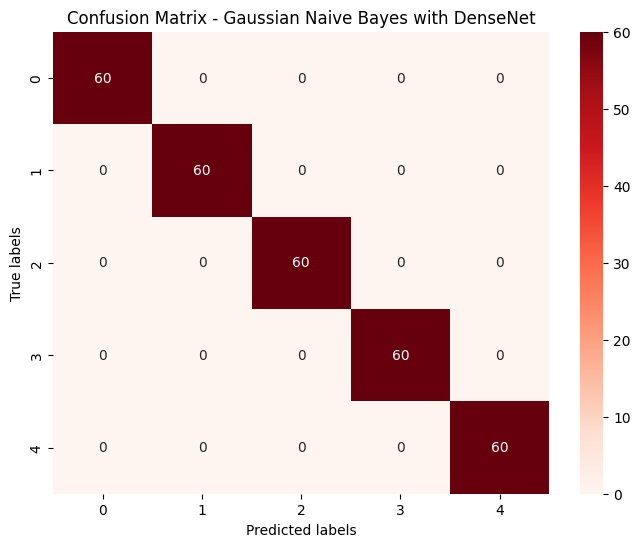

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from tensorflow.keras import layers
import torch
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Flatten the features for B2
x_train_flat_b2 = np.array([feature.flatten() for feature in x_train])
x_test_flat_b2 = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1] for B2
scaler_b2 = MinMaxScaler()
x_train_scaled_b2 = scaler_b2.fit_transform(x_train_flat_b2)
x_test_scaled_b2 = scaler_b2.transform(x_test_flat_b2)

# Ensure non-negative values for B2
min_value_b2 = np.min(np.concatenate([x_train_scaled_b2, x_test_scaled_b2]))
x_train_scaled_non_negative_b2 = x_train_scaled_b2 - min_value_b2
x_test_scaled_non_negative_b2 = x_test_scaled_b2 - min_value_b2

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for DenseNet...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b2, y_train)
    # Predict on test set
    y_pred_b2 = clf.predict(x_test_scaled_non_negative_b2)
    # Print performance metrics
    print(f'Performance metrics for {clf_name} with DenseNet:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_b2))  # Corrected variable names

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred_b2)  # Corrected variable names
    sensitivity = metrics.recall_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    precision = metrics.precision_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    f1 = metrics.f1_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    specificity = metrics.recall_score(y_test, y_pred_b2, average='macro', pos_label=0)  # Specificity
    recall = metrics.recall_score(y_test, y_pred_b2, average='macro')  # Recall

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Specificity: {specificity}')
    print(f'Recall: {recall}\n')

    # Confusion matrix
    cm_b2 = confusion_matrix(y_test, y_pred_b2)  # Corrected variable names

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b2, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with DenseNet')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
